
# Basic raster processing: Rasterio, Pillow

## What is Rasterio?
Rasterio is an open source library used for raster processing that can be used for reading and writing raster formats in Python.

## Import rasterio library

In [6]:
import rasterio


## What is Pillow?
Python Pillow is an open source library. It is a for of pillow an old library called PIL. It is used for image processing for Python.

## Import pillow library

In [2]:
from PIL import Image
from IPython.display import display

## Reading the raster dataset
Rasterio can be used to read, write and process the raster dataset. We use `open` function from rasterio to open the raster data.

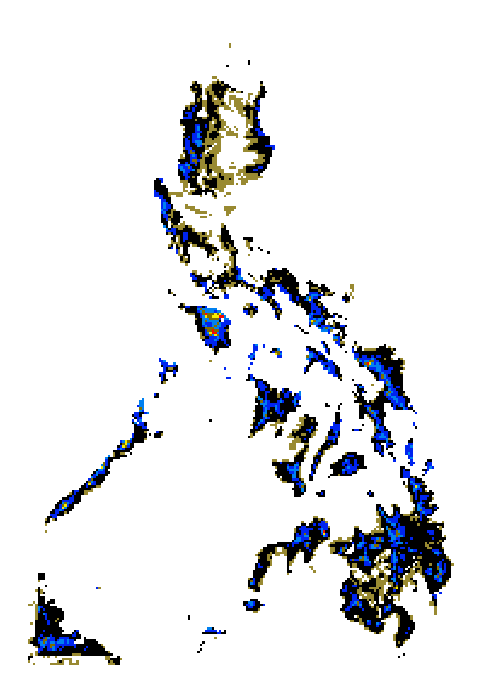

In [3]:
im = Image.open("src/ph raster.PNG")
display(im)


### SHP for clipping

In [ ]:
import geopandas as gpd
geo = gpd.read_file("src/ph-bb.shp")
geo.plot()


## Clipping vectors
To clip a polygon to a raster, we will use geopandas to read geometries and clip regions.

In [ ]:
import geopandas as gpd
import rasterio
import rasterio.mask
from PIL import Image
from rasterio.plot import show
geo = gpd.read_file("src/ph-bb.shp")

with rasterio.open("src/rainmap_gtif_day1.tif") as src:
  print(src.crs)
  out_image, out_transform = rasterio.mask.mask(src, geo.geometry, filled = True)

show(out_image)


## What is geocube?
geocube is a python library used to convert geopandas to rasterized xarray data.

## Import geocube library

In [ ]:
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata


### GeoJSON for interpolation

In [ ]:
gdf = gpd.read_file("src/sample_interpolation.shp")
gdf.plot()


## Interpolate points
### Import geocube library
first thing we do is import functools partial to fix the number of arguments/parameters of another function.

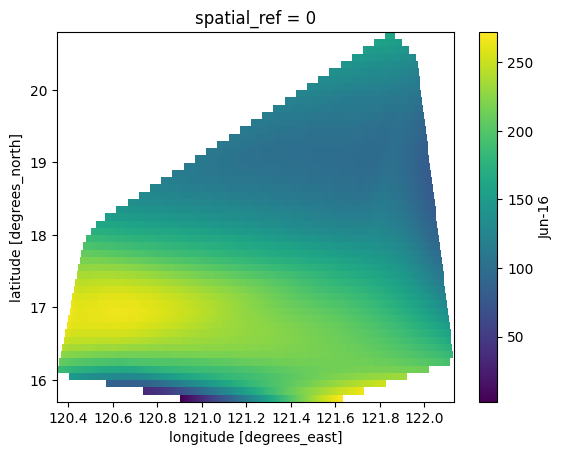

In [4]:
import geopandas as gpd
from functools import partial
from geocube.api.core import make_geocube
from geocube.rasterize import rasterize_points_griddata

gdf = gpd.read_file("src/sample_interpolation.shp")

geo_grid_cubic = make_geocube(
    gdf,
    measurements=["Jun-16"],
    resolution=(-0.1, 0.00001),
    rasterize_function=partial(rasterize_points_griddata, method="cubic"),
)

geo_grid_cubic["Jun-16"].plot.imshow()

## Let's try this!
### Processing the Philippine Elevation Data

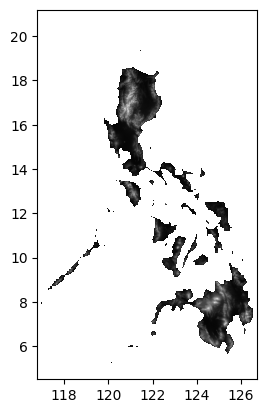

[[[-9999 -9999 -9999 ... -9999 -9999 -9999]
  [-9999 -9999 -9999 ... -9999 -9999 -9999]
  [-9999 -9999 -9999 ... -9999 -9999 -9999]
  ...
  [-9999 -9999 -9999 ... -9999 -9999 -9999]
  [-9999 -9999 -9999 ... -9999 -9999 -9999]
  [-9999 -9999 -9999 ... -9999 -9999 -9999]]]


In [11]:
from rasterio.plot import show 
# Read data
ds = rasterio.open("activities/PHL_msk_alt.vrt")
show(ds, transform=ds.transform, cmap='gray')

# reading the data
data = ds.read()
print(data)

### Reading some additional information
Also we can read the additional informations like datatype, number of cells, rows, columns etc of the raster file. Now, we are going to read the following information of the raster,

- Image filename
- Number of bands
- Number of rows and columns
- Driver
- Coordinate system
- Metadata
- Description
- Size
- dataType
- mininum and maximum value

In [8]:
# what is the name of this image
img_name = ds.name
print('Image filename: ', img_name)
print("----------------------------------------------------------------------------------------------------")

# How many bands does this image have?
num_bands = ds.count
print('Number of bands in image: ', num_bands)
print("----------------------------------------------------------------------------------------------------")

# How many rows and columns?
rows, cols = ds.shape
print('Image size is: {0} rows x {1} columns.'.format(rows, cols))
print("----------------------------------------------------------------------------------------------------")

# What driver was used to open the raster?
driver = ds.driver
print('Raster driver: ', driver)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's projection?
proj = ds.crs
print('Image projection: ', proj)
print("----------------------------------------------------------------------------------------------------")

# What is the raster's "geo-transform"
gt = ds.transform
print('Image geo-transform: ', gt)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a description?
desc = ds.descriptions
print('Raster description: ', desc)
print("----------------------------------------------------------------------------------------------------")

# Does the raster have a metadata?
metadata = ds.meta
print('All raster metadata: ', metadata)
print("----------------------------------------------------------------------------------------------------")

# Size of the image
data_size = data.size
print("Data size: ", data_size)
print("----------------------------------------------------------------------------------------------------")

# Data type of the image
dtype = data.dtype
print("Data type: ", dtype)
print("----------------------------------------------------------------------------------------------------")

# Get minimum and maximum value 
min_value = data.min()
max_value = data.max()
print("Data minimum value: ", min_value)
print("Data maximum value: ", max_value)
print("----------------------------------------------------------------------------------------------------")

# Get width and height of the raster
shape = data.shape
print("Data shape: ", shape)
print("----------------------------------------------------------------------------------------------------")

Image filename:  activities/PHL_msk_alt.vrt
----------------------------------------------------------------------------------------------------
Number of bands in image:  1
----------------------------------------------------------------------------------------------------
Image size is: 2004 rows x 1188 columns.
----------------------------------------------------------------------------------------------------
Raster driver:  VRT
----------------------------------------------------------------------------------------------------
Image projection:  GEOGCS["unknown",DATUM["Unknown based on WGS84 ellipsoid",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
----------------------------------------------------------------------------------------------------
Image geo-transform:  | 0.01, 0.00, 116.80|
| 0.00,-0.01, 21.20|

## Visualization of raster data
The rasterio has the show function, which allows us to display the image. First of all we need to import the library after that we can visualize the map.

*transform (Affine, optional)* – Defines the affine transform if source is an array.

*cmap (color_ramp name, optional)* - The name of the color ramp. You can find the available name list in Matplotlib colormaps

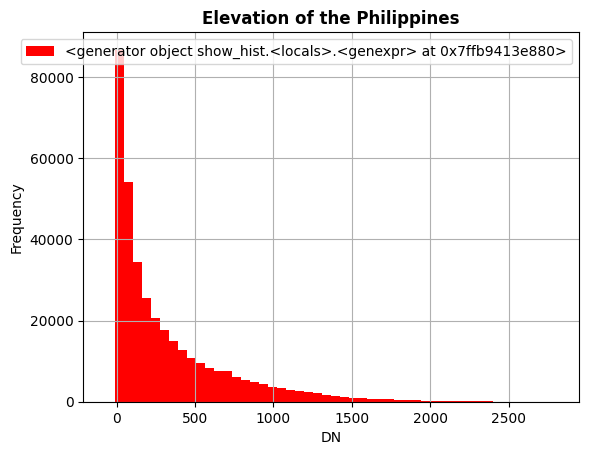

In [9]:
from rasterio.plot import show, show_hist
show_hist(ds, bins=50, title='Elevation of the Philippines')

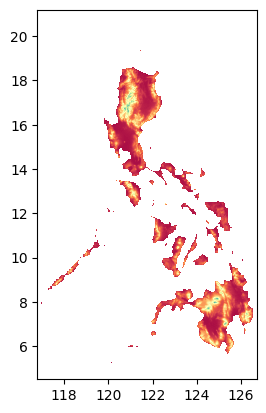

<Axes: >

In [10]:
show(ds, transform=ds.transform, cmap='Spectral')